# Simple Linear Regression - Dr.SVN

In [1]:
import warnings
warnings.filterwarnings('ignore')
# https://docs.python.org/3/library/warnings.html

In [2]:
import pandas as pd # pandas 
import numpy as np # numpy 

In [3]:
np.set_printoptions(precision=4, linewidth=100)
# Setting Pandas print option to print decimal values upto 4 places

In [6]:
mba_salary_df = pd.read_csv( r"C:\Users\sridhar.v\MLAP - DK - Data\MBA Salary.csv")
# Load the dataset. Type 'r' before your normal string it converts normal string to raw string.

In [7]:
mba_salary_df.head( 10 )
# First 10 Rows in Dataset

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000
5,6,55.00,300000
6,7,70.00,260000
7,8,68.00,235000
8,9,82.80,425000
9,10,59.00,240000


In [8]:
mba_salary_df.info()
# More about the Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


In [9]:
import statsmodels.api as sm
# statsmodels is a Python module that provides classes and functions 
# for the estimation of many different statistical models, 
# as well as for conducting statistical tests, and statistical data exploration.

In [15]:
X = sm.add_constant( mba_salary_df['Percentage in Grade 10'] )
X.head(5)
#Separate the "Independent Variable"

,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [10]:
Y = mba_salary_df['Salary']
# Dependent Variable separate.

In [13]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into Train and Test.

In [16]:
train_X, test_X, train_y, test_y = train_test_split( X ,Y,train_size = 0.8,random_state = 100 )
# 80:20 - Train:Test
# Random State?

In [17]:
mba_salary_lm = sm.OLS( train_y, train_X ).fit()
# Model Fit

In [18]:
print( mba_salary_lm.params )
# Estimated Parameter Results

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


In [14]:
mba_salary_lm.summary2()
# Model Diagostics

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2020-06-20 06:26      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8089 176079.3802
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================

"""

In [15]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
# Python libraries for Visualization

<Figure size 576x432 with 0 Axes>

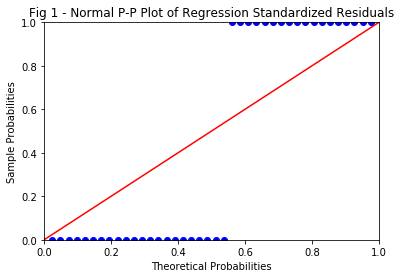

In [16]:
mba_salary_resid = mba_salary_lm.resid
probplot = sm.ProbPlot( mba_salary_resid )
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "Fig 1 - Normal P-P Plot of Regression Standardized Residuals" )
plt.show()
#Residual Analysis

In [17]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
# Testing for uniform variance - Homoscedasticity

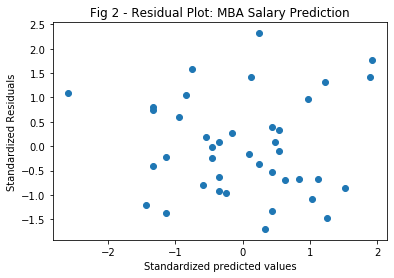

In [18]:
plt.scatter( get_standardized_values( mba_salary_lm.fittedvalues ),
get_standardized_values( mba_salary_resid ) )
plt.title( "Fig 2 - Residual Plot: MBA Salary Prediction" );
plt.xlabel( "Standardized predicted values")
plt.ylabel( "Standardized Residuals");

In [19]:
from scipy.stats import zscore
# Finding Z-Score for Outlier Analysis

In [20]:
mba_salary_df['z_score_salary'] = zscore( mba_salary_df.Salary )

In [21]:
mba_salary_df[ (mba_salary_df.z_score_salary > 3.0) | (mba_salary_df.z_score_salary < -3.0) ]
# Outlier would lie in plus or minus 3 SD.

,S. No.,Percentage in Grade 10,Salary,z_score_salary


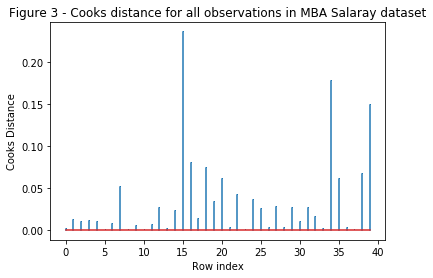

In [22]:
import numpy as np
mba_influence = mba_salary_lm.get_influence()
(c, p) = mba_influence.cooks_distance
plt.stem( np.arange( len( train_X) ),
np.round( c, 3 ),
markerfmt="," );
plt.title( "Figure 3 - Cooks distance for all observations in MBA Salaray dataset" );
plt.xlabel( "Row index")
plt.ylabel( "Cooks Distance");
# Cooks Distance

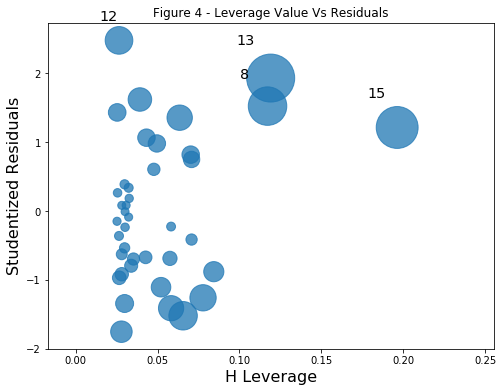

In [23]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots( figsize=(8,6) )
influence_plot( mba_salary_lm, ax = ax )
plt.title( "Figure 4 - Leverage Value Vs Residuals")
plt.show();

# Leverage Value

In [24]:
pred_y = mba_salary_lm.predict( test_X )
# Prediction on Validation set

In [25]:
from sklearn.metrics import r2_score, mean_squared_error

In [26]:
np.abs(r2_score(test_y, pred_y))

0.15664584974230378

In [27]:
import numpy

In [28]:
np.sqrt(mean_squared_error(test_y, pred_y))

73458.04348346894

In [29]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
# Predict the y values
pred_y = mba_salary_lm.predict( test_X )
# Predict the low and high interval values for y
_, pred_y_low, pred_y_high = wls_prediction_std( mba_salary_lm,
test_X,
alpha = 0.1)
# Store all the values in a dataframe
pred_y_df = pd.DataFrame( { 'grade_10_perc': test_X['Percentage in Grade 10'],
'pred_y': pred_y,
'pred_y_left': pred_y_low,
'pred_y_right': pred_y_high } )

In [30]:
pred_y_df[0:10]

,grade_10_perc,pred_y,pred_y_left,pred_y_right
6,70.0,279828.402452,158379.832044,401276.972860
36,68.0,272707.227686,151576.715020,393837.740352
37,52.0,215737.829560,92950.942395,338524.716726
28,58.0,237101.353858,115806.869618,358395.838097
43,74.5,295851.045675,173266.083342,418436.008008
49,60.8,247070.998530,126117.560983,368024.436076
5,55.0,226419.591709,104507.444388,348331.739030
33,78.0,308313.101515,184450.060488,432176.142542
20,63.0,254904.290772,134057.999258,375750.582286
42,74.4,295494.986937,172941.528691,418048.445182
